### Scalecast with LSTM and ML model (Linear Regression) 

#### LSTM model (Long Short-Term Memory Neural Network)
- Scalecast library hosts a TensorFlow LSTM that can easily be used for time series forecasting
- Steps to use library
    - Specify a test length: The test length is a discrete number of the last observations in the    full time series
    - Generate future dates: The number of dates you generate in this step will determine how long all models will be forecast out
    - Choose an estimator: will be using the “lstm” estimator

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from scalecast.Forecaster import Forecaster

In [3]:
# pip install tensorflow, https://www.tensorflow.org/install
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Read the dataset

df = pd.read_csv('D:\\PythonProjects\\DataSets\\googl.csv', parse_dates= ['Date'])

#df = pd.read_csv('D:\\PythonProjects\\DataSets\\AirPassengers.csv', parse_dates = ['Month'])

#SKK, thousands converts prices with comma to decimal
# df = pd.read_csv('D:\\PythonProjects\\DataSets\\ASIANPAINT_1.csv', parse_dates = True, 
#                  index_col = 'Date', thousands=',') 

# df = pd.read_csv('D:\\PythonProjects\\DataSets\\ASIANPAINT_1.csv', parse_dates = True, 
#                  index_col = 'Date') 

In [ ]:
df.head()

In [ ]:
print(len(df))

In [5]:
df.sort_index(inplace=True)

In [ ]:
df.index

In [ ]:
print(len(df))

In [ ]:
df.head()

In [ ]:
df.tail()

In [6]:
#f = Forecaster(y=df['Close'],current_dates=df.index)

f = Forecaster(
    y=df['Close'],  #df.iloc[:, 0] ,   #passengers column 0th col
    current_dates=df['Date']
)


# f = Forecaster(
#     y=df['Passengers'],  #df.iloc[:, 0] ,   #passengers column 0th col
#     current_dates=df['Month']
# )


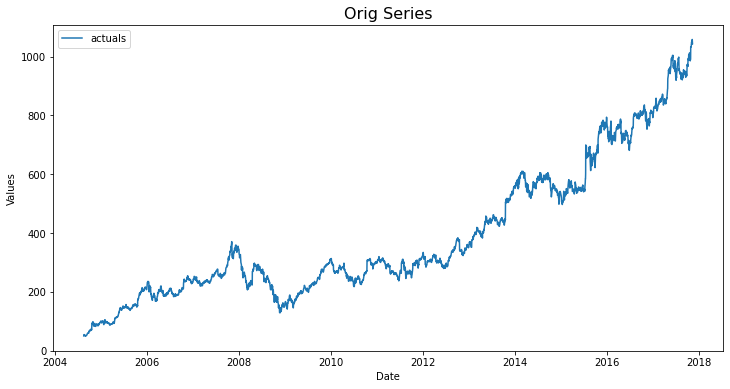

In [7]:
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [8]:
f

Forecaster(
    DateStartActuals=2004-08-19T00:00:00.000000000
    DateEndActuals=2017-11-10T00:00:00.000000000
    Freq=None
    N_actuals=3333
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [ ]:
figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36)
plt.show()

In [ ]:
plt.rc("figure",figsize=(10,6))
f.seasonal_decompose(period=5).plot()   #result = seasonal_decompose(df['Close'], model ='multiplicative', period=30)
plt.show()

In [9]:
f.set_test_length(120) # 20% test set
f.generate_future_dates(120)

In [10]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

101/101 [==============================] - 4s 4ms/step - loss: 0.2663


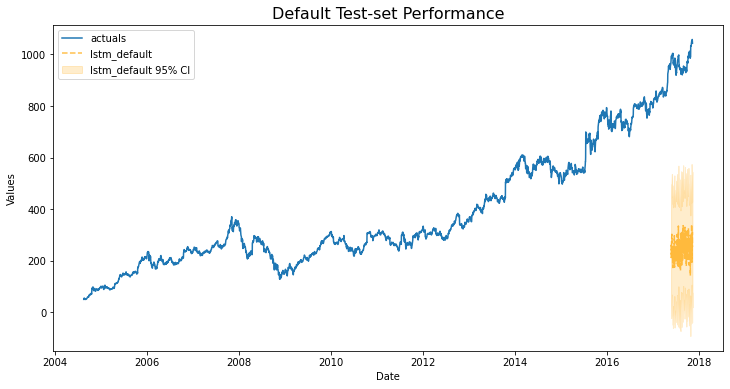

In [11]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()

##### Improving lstm prediction
- Add more lags (e.g 24 i.e 2 years)
- Add more epochs (e.g. 5)
- Add layers, early stopping

#### MLR model

In [12]:
from scalecast.SeriesTransformer import SeriesTransformer

In [13]:
transformer = SeriesTransformer(f)
f = transformer.DiffTransform(m=5) # 5 days of week
f = transformer.DetrendTransform()

In [14]:
f.add_ar_terms(20)
f.add_seasonal_regressors('week','month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()

In [15]:
f.set_estimator('mlr')
f.manual_forecast(call_me='mlr') #,dynamic_testing=24

In [16]:
f = transformer.DetrendRevert()
f = transformer.DiffRevert(5)


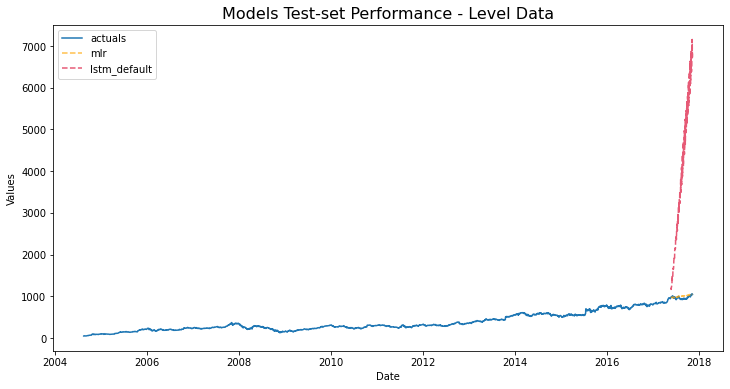

In [17]:
f.plot_test_set(order_by='TestSetMAPE',models=['lstm_default', 'mlr'])
plt.title('Models Test-set Performance - Level Data',size=16)
plt.show()

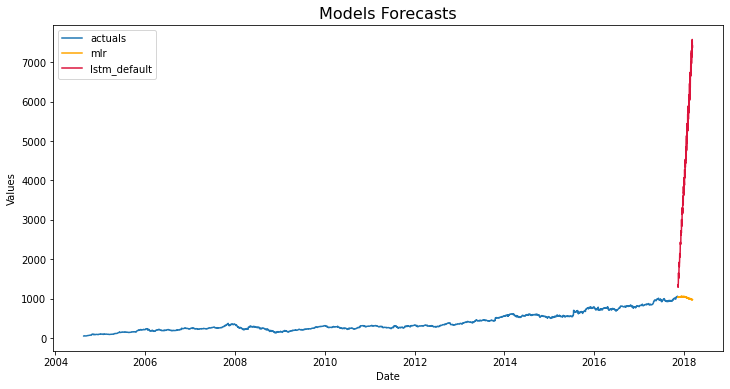

In [18]:
f.plot(order_by='TestSetMAPE',models=['lstm_default', 'mlr'])
plt.title('Models Forecasts',size=16)
plt.show()

In [ ]:
# df.index
# datetime_series = pd.to_datetime(df['Date'])
# datetime_index = pd.DatetimeIndex(datetime_series.values)
# df1=df.set_index(datetime_index)
# df1.drop('Date',axis=1,inplace=True)
#df2=df1.asfreq('D')

https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf

https://github.com/mikekeith52/scalecast-examples/blob/main/lstm/lstm.ipynb